In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from scipy import stats

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_initial = pd.read_csv('data_cleanedV4.csv', index_col=0)

In [3]:
pd.set_option('display.max_columns', None)
df_initial.head()

,ID,Name,Summary,Space,Neighborhood Overview,Notes,Transit,Interaction,Host Since,Host Verifications,Neighbourhood Cleansed,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Calendar Updated,Availability 60,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Geolocation,Features
0,5380461,"Roland Garros, Appart. 2 p. avec balcon, Auteuil.","Appart. ascenc. 1 ch. avec lit double, cuisine...",L'appartement est situé dans le quartier résid...,"J'apprécie le côté résidentiel du quartier, ca...",Nombreux commerces et restaurants à proximité.,Vous pourrez accéder à l'appartement par les l...,Je souhaite louer mon appartement à des person...,2015-02-17,"email,phone,reviews",Passy,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator...",50.0,500.0,30.0,1,0,4 days ago,15,80.0,7.0,8.0,9.0,9.0,10.0,7.0,flexible,0.16,"48.8445603313,2.26336692547","Host Has Profile Pic,Is Location Exact"
1,12994171,APARTMENT 100 M2,location trocadero Passy very well located ans...,la situation et la tranquillité ainsi que l'ac...,situation à 5 min à pied de la tour Eiffel et ...,NaN,métro à 3 min à pied,si vous avez des besoins particuliers ...cours...,2016-05-12,"email,phone,reviews",Passy,Apartment,Entire home/apt,5,2.0,2.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Wheelch...",250.0,750.0,90.0,4,15,today,28,95.0,10.0,10.0,10.0,10.0,10.0,9.0,strict,0.56,"48.8580714183,2.28022090415","Host Has Profile Pic,Is Location Exact"
2,16270986,Appartement familial église d'auteuil,"Mon logement est proche de Beaugrenelle Paris,...",NaN,NaN,NaN,NaN,NaN,2016-10-25,"email,phone,facebook,reviews",Passy,Apartment,Entire home/apt,7,1.5,2.0,5.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",165.0,200.0,30.0,1,0,today,51,100.0,10.0,10.0,10.0,10.0,10.0,10.0,flexible,1.00,"48.8502032736,2.27083162889","Host Has Profile Pic,Is Location Exact,Instant..."
3,16267918,Studio 25m2 16e arrondissement,Petit studio situé dans le 16 e arrondissement...,NaN,"Boulangerie, coiffeur, Franprix etc",NaN,Bus 72 et 22 arrêt victorien Sardou Météo lig...,NaN,2015-12-11,"email,phone,reviews",Passy,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator...",35.0,94.0,0.0,1,0,4 months ago,0,93.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate,1.38,"48.8420130083,2.26885375663","Host Has Profile Pic,Is Location Exact"
4,8531724,Cosy and bright flat,"Nice flat, recently renovated, bright and cosy...",The flat is in the 4th floor of a secure build...,The area is very pleasant and chic. It is both...,The bedsheets and towels are included in the r...,The flat is very well located for transportati...,I will welcome you in the flat to give you the...,2014-01-28,"email,phone,reviews",Passy,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator...",90.0,500.0,30.0,2,10,6 months ago,39,100.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,0.35,"48.8410481577,2.25944805867","Host Has Profile Pic,Is Location Exact"


In [4]:
df_final = pd.read_csv('final_cleaned_dataset.csv')

In [5]:
df_final.head()

,Host Since,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Calendar Updated,Availability 60,Review Scores Rating,Cancellation Policy,Reviews per Month,Entire home/apt,Private room,Shared room,apartment,bed_breakfast,hoster,house,other,Amenities : Heating,Amenities : Self Check-In,Amenities : 24-hour check-in,Amenities : Game console,Amenities : Pets allowed,Amenities : Buzzer/wireless intercom,Amenities : Suitable for events,Amenities : Hair dryer,Amenities : Stair gates,Amenities : Doorman,Amenities : Baby monitor,Amenities : Shampoo,Amenities : Changing table,Amenities : Table corner guards,Amenities : Outlet covers,Amenities : Paid parking off premises,Amenities : Breakfast,Amenities : Safety card,Amenities : Bathtub,Amenities : Lock on bedroom door,Amenities : Washer,Amenities : Laptop friendly workspace,Amenities : Private living room,Amenities : Crib,Amenities : Carbon monoxide detector,Amenities : Dryer,Amenities : Wireless Internet,Amenities : Children’s books and toys,Amenities : Indoor fireplace,Amenities : Smartlock,Amenities : Internet,Amenities : Wheelchair accessible,Amenities : Lockbox,Amenities : Air conditioning,Amenities : translation missing: en.hosting_amenity_50,Amenities : Dog(s),Amenities : Free parking on street,Amenities : High chair,Amenities : Other pet(s),Amenities : Pets live on this property,Amenities : Fireplace guards,Amenities : Pool,Amenities : Elevator in building,Amenities : Keypad,Amenities : Washer / Dryer,Amenities : Family/kid friendly,Amenities : Doorman Entry,Amenities : Kitchen,Amenities : translation missing: en.hosting_amenity_49,Amenities : Private entrance,Amenities : Children’s dinnerware,Amenities : Iron,Amenities : Smoke detector,Amenities : Smoking allowed,Amenities : First aid kit,Amenities : Baby bath,Amenities : Room-darkening shades,Amenities : Hot tub,Amenities : Free parking on premises,Amenities : Pack ’n Play/travel crib,Amenities : Hangers,Amenities : Window guards,Amenities : TV,Amenities : Fire extinguisher,Amenities : Cat(s),Amenities : Essentials,Amenities : Cable TV,Amenities : Babysitter recommendations,Amenities : Gym,Host Verifications : manual_online,Host Verifications : kba,Host Verifications : facebook,Host Verifications : None,Host Verifications : google,Host Verifications : government_id,Host Verifications : sesame,Host Verifications : identity_manual,Host Verifications : sent_id,Host Verifications : weibo,Host Verifications : amex,Host Verifications : work_email,Host Verifications : offline_government_id,Host Verifications : phone,Host Verifications : email,Host Verifications : jumio,Host Verifications : reviews,Host Verifications : manual_offline,Host Verifications : selfie,Host Verifications : sesame_offline,Host Verifications : linkedin,Host Verifications : photographer,Features : Host Has Profile Pic,Features : Instant Bookable,Features : Host Identity Verified,Features : Host Is Superhost,Features : Require Guest Profile Picture,Features : Require Guest Phone Verification,Features : Is Location Exact,Neighbourhood Cleansed : Panthéon,Neighbourhood Cleansed : Bourse,Neighbourhood Cleansed : Buttes-Chaumont,Neighbourhood Cleansed : Buttes-Montmartre,Neighbourhood Cleansed : Popincourt,Neighbourhood Cleansed : Luxembourg,Neighbourhood Cleansed : Entrepôt,Neighbourhood Cleansed : Élysée,Neighbourhood Cleansed : Gobelins,Neighbourhood Cleansed : Opéra,Neighbourhood Cleansed : Observatoire,Neighbourhood Cleansed : Louvre,Neighbourhood Cleansed : Passy,Neighbourhood Cleansed : Vaugirard,Neighbourhood Cleansed : Palais-Bourbon,Neighbourhood Cleansed : Temple,Neighbourhood Cleansed : Reuilly,Neighbourhood Cleansed : Hôtel-de-Ville,Neighbourhood Cleansed : Ménilmontant,Neighbourhood Cleansed : Batignolles-Monceau,30 nearest POI average
0,1884.0,2,1.0,1.0,1.0,1,50.0,500.0,30.0,1,0,4,15,80.0,0,0.16,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1

# Création d'une colonne 'Arrondissement'

In [6]:
def Get_arrondissements(x):
    arrondissements = {
        "Louvre": '1er', "Bourse": '2ème', "Temple": '3ème', "Hôtel-de-Ville": '4ème', "Panthéon": '5ème', 
        "Luxembourg": '6ème', "Palais-Bourbon": '7ème', "Élysée": '8ème', "Opéra": '9ème', "Entrepôt": '10ème', 
        "Popincourt": '11ème', "Reuilly": '12ème', "Gobelins": '13ème', "Observatoire": '14ème', 
        "Vaugirard": '15ème', "Passy": '16ème', "Batignolles-Monceau": '17ème', "Buttes-Montmartre": '18ème', 
        "Buttes-Chaumont": '19ème', "Ménilmontant": '20ème'
    }
    try:
        arrondissements[x]
    except:
        print(x)
    return arrondissements[x]

In [7]:
df_initial['Arrondissement'] = df_initial['Neighbourhood Cleansed'].apply(lambda x :Get_arrondissements(str(x)))

# Statistiques descriptives

In [8]:
df_stat = df_final.copy()

In [9]:
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40028 entries, 0 to 40027
Columns: 143 entries, Host Since to 30 nearest POI average
dtypes: float64(10), int64(133)
memory usage: 43.7 MB


## Statistiques principales sur les colonnes quantitatives

In [10]:
numerical_columns = ['Host Since', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People','Availability 60', 
        'Review Scores Rating', 'Reviews per Month', 'Calendar Updated','30 nearest POI average']

df_stat[numerical_columns].describe()

,Host Since,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Availability 60,Review Scores Rating,Reviews per Month,Calendar Updated,30 nearest POI average
count,40028.000000,40028.000000,40028.000000,40028.000000,40028.000000,40028.000000,40028.000000,40028.000000,40028.000000,40028.000000,40028.000000,40028.000000,40028.000000,40028.000000,40028.000000
mean,2153.795418,3.058484,1.084753,1.040347,1.688418,92.883482,197.318677,24.005571,1.462127,6.213351,18.296218,91.870691,1.188925,80.411712,0.409778
std,546.688376,1.498611,0.369105,0.792195,1.058840,71.008461,212.829815,27.220382,0.943498,13.060521,20.752015,8.213661,1.382900,320.220967,0.069755
min,120.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.010000,0.000000,0.183167
25%,1741.000000,2.000000,1.000000,1.000000,1.000000,54.000000,0.000000,0.000000,1.000000,0.000000,0.000000,89.000000,0.280000,2.000000,0.368352
50%,2126.000000,2.000000,1.000000,1.000000,1.000000,75.000000,150.000000,20.000000,1.000000,0.000000,9.000000,93.000000,0.690000,14.000000,0.412295
75%,2525.000000,4.000000,1.000000,1.000000,2.000000,102.000000,300.000000,38.000000,2.000000,10.000000,33.000000,98.000000,1.560000,90.000000,0.449757
max,4246.000000,16.000000,8.000000,10.000000,16.000000,999.000000,999.000000,750.000000,16.000000,753.000000,60.000000,100.000000,18.000000,9999.000000,2.117988


## Test de normalité - Statistique de Jarque Bera

In [11]:
def Test_normalite (df):
    colonne = []
    statistiques = []
    p_valeurs = []
    
    for i in df.columns:
        statistique = stats.jarque_bera(df[i])
        stat = round(statistique[0],3)
        p_value = round(statistique[1],3)
        colonne.append(i)
        statistiques.append(stat)
        p_valeurs.append(p_value)

    result = pd.DataFrame(np.column_stack([colonne, statistiques, p_valeurs]),
                          columns=['Variable', 'Statistique de Jarque Bera', 'p-valeur'])
    return result

In [12]:
df_test_normalite = Test_normalite(df_stat)
df_test_normalite.iloc[0:50,:]

,Variable,Statistique de Jarque Bera,p-valeur
0,Host Since,1059.807,0.0
1,Accommodates,71125.912,0.0
2,Bathrooms,9404358.55,0.0
3,Bedrooms,38561.602,0.0
4,Beds,812840.345,0.0
5,Bed Type,71893.404,0.0
6,Price,1152087.355,0.0
7,Security Deposit,6326.798,0.0
8,Cleaning Fee,1407197.745,0.0
9,Guests Included,656288.349,0.0


In [13]:
df_test_normalite.iloc[50:100,:]

,Variable,Statistique de Jarque Bera,p-valeur
50,Amenities : Wireless Internet,746075.403,0.0
51,Amenities : Children’s books and toys,3937681851.161,0.0
52,Amenities : Indoor fireplace,161487.467,0.0
53,Amenities : Smartlock,356680277.714,0.0
54,Amenities : Internet,8275.503,0.0
55,Amenities : Wheelchair accessible,339406.182,0.0
56,Amenities : Lockbox,6572377.3,0.0
57,Amenities : Air conditioning,445758.313,0.0
58,Amenities : translation missing: en.hosting_am...,7560.884,0.0
59,Amenities : Dog(s),60454739.15,0.0


In [14]:
df_test_normalite.iloc[100:150,:]

,Variable,Statistique de Jarque Bera,p-valeur
100,Host Verifications : identity_manual,495996049.279,0.0
101,Host Verifications : sent_id,555503253.004,0.0
102,Host Verifications : weibo,5034160558.227,0.0
103,Host Verifications : amex,106810736480.72,0.0
104,Host Verifications : work_email,259301.189,0.0
105,Host Verifications : offline_government_id,943991.727,0.0
106,Host Verifications : phone,11943669.413,0.0
107,Host Verifications : email,2564178.632,0.0
108,Host Verifications : jumio,6713.04,0.0
109,Host Verifications : reviews,392562875.839,0.0


## Analyse de la variable 'Prix'

In [15]:
def dist_box(data, colums, fsize=12):

    """
    Box-plot affichant les index des valeurs outliers ainsi que la distribution
    Paramètres 
    -----------
    data : dataframe contenant les données
    colums : chaine de caractère du nom de la colonne 
    vertical : orientation des box-plot (vertical par défaut)
    fsize : taille de la police des index des valeurs outliers
    """
    fig = plt.figure(figsize=(8,7))
    gs = fig.add_gridspec(4, 4)
    f_ax1 = fig.add_subplot(gs[0, :])
    f_ax2 = fig.add_subplot(gs[1:,:],sharex=f_ax1)

    mean=data[colums].mean()

    median=data[colums].median()
    print(colums)
    print("Moyenne : ",round(data[colums].mean(),2))
    print("median : ",round(data[colums].median(),2))
    print("Min : ",data[colums].min())
    print("Max : ",data[colums].max())
    print("Count : ", data[colums].size, ", dont NA : ", data[colums].isna().sum())

    B = f_ax1.boxplot(data[colums], vert=False, patch_artist=True, 
                    flierprops={'marker':"D",'markersize':'3','markerfacecolor':'b'}, 
                      medianprops={'color':'grey', 'lw':'2'}, 
                    boxprops={'color':'grey','lw':'2'}, whiskerprops={'color':'grey','lw':'2'},
                   capprops={'color':'grey','lw':'2'})

    fliers = B["fliers"][0].get_xdata()
    for f in fliers :
        ypos = B["medians"][0].get_ydata()[0]
        name = list(data[colums].index[data[colums] == f])[0]
        f_ax1.text(f, 0.2 + ypos, name, fontsize=fsize, rotation='vertical')

    f_ax1.axvline(mean, color='r', linestyle='--')
    f_ax1.axvline(median, color='g', linestyle='-')
    f_ax1.axes.get_xaxis().set_visible(False)

    f_ax2.axvline(mean, color='r', linestyle='--')
    f_ax2.axvline(median, color='g', linestyle='-')
    f_ax2.legend({'Mean':mean,'Median':median})
    f_ax2 = sns.distplot(data[colums])
    plt.show()

def stat_univ(data, var, corr=True):

    dist_box(data,var)
    plt.figure(figsize=(23,1))
    
    if(corr):
        correlation =  data.corr(method='pearson')[var].round(2).to_frame().sort_values(by=var).T
        sns.heatmap(correlation,cmap="RdYlGn_r",fmt="g",annot=True)

#stat_univ(df_1, 'inscrits_1')



Price
Moyenne :  92.88
median :  75.0
Min :  8.0
Max :  999.0
Count :  40028 , dont NA :  0


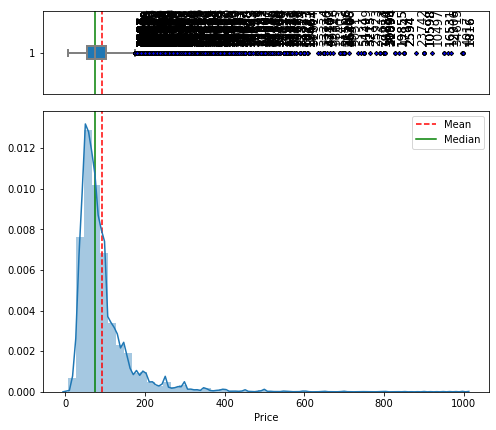

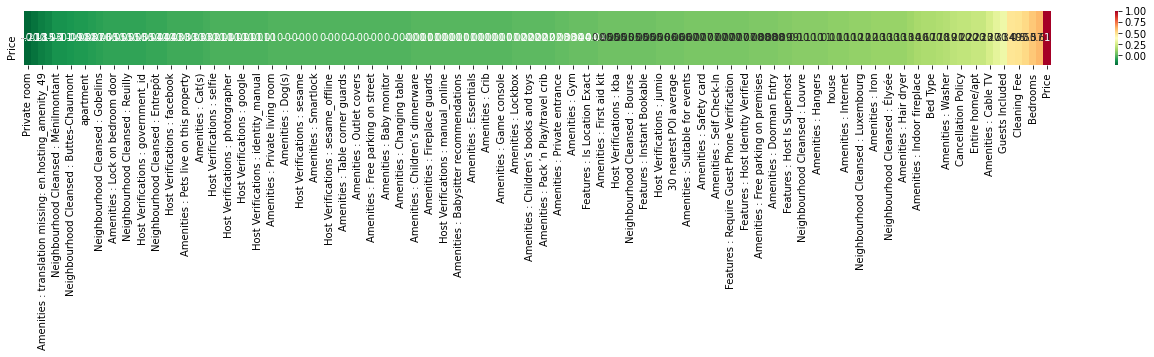

In [16]:
stat_univ(df_stat, "Price")

## Corrélations

module://ipykernel.pylab.backend_inline


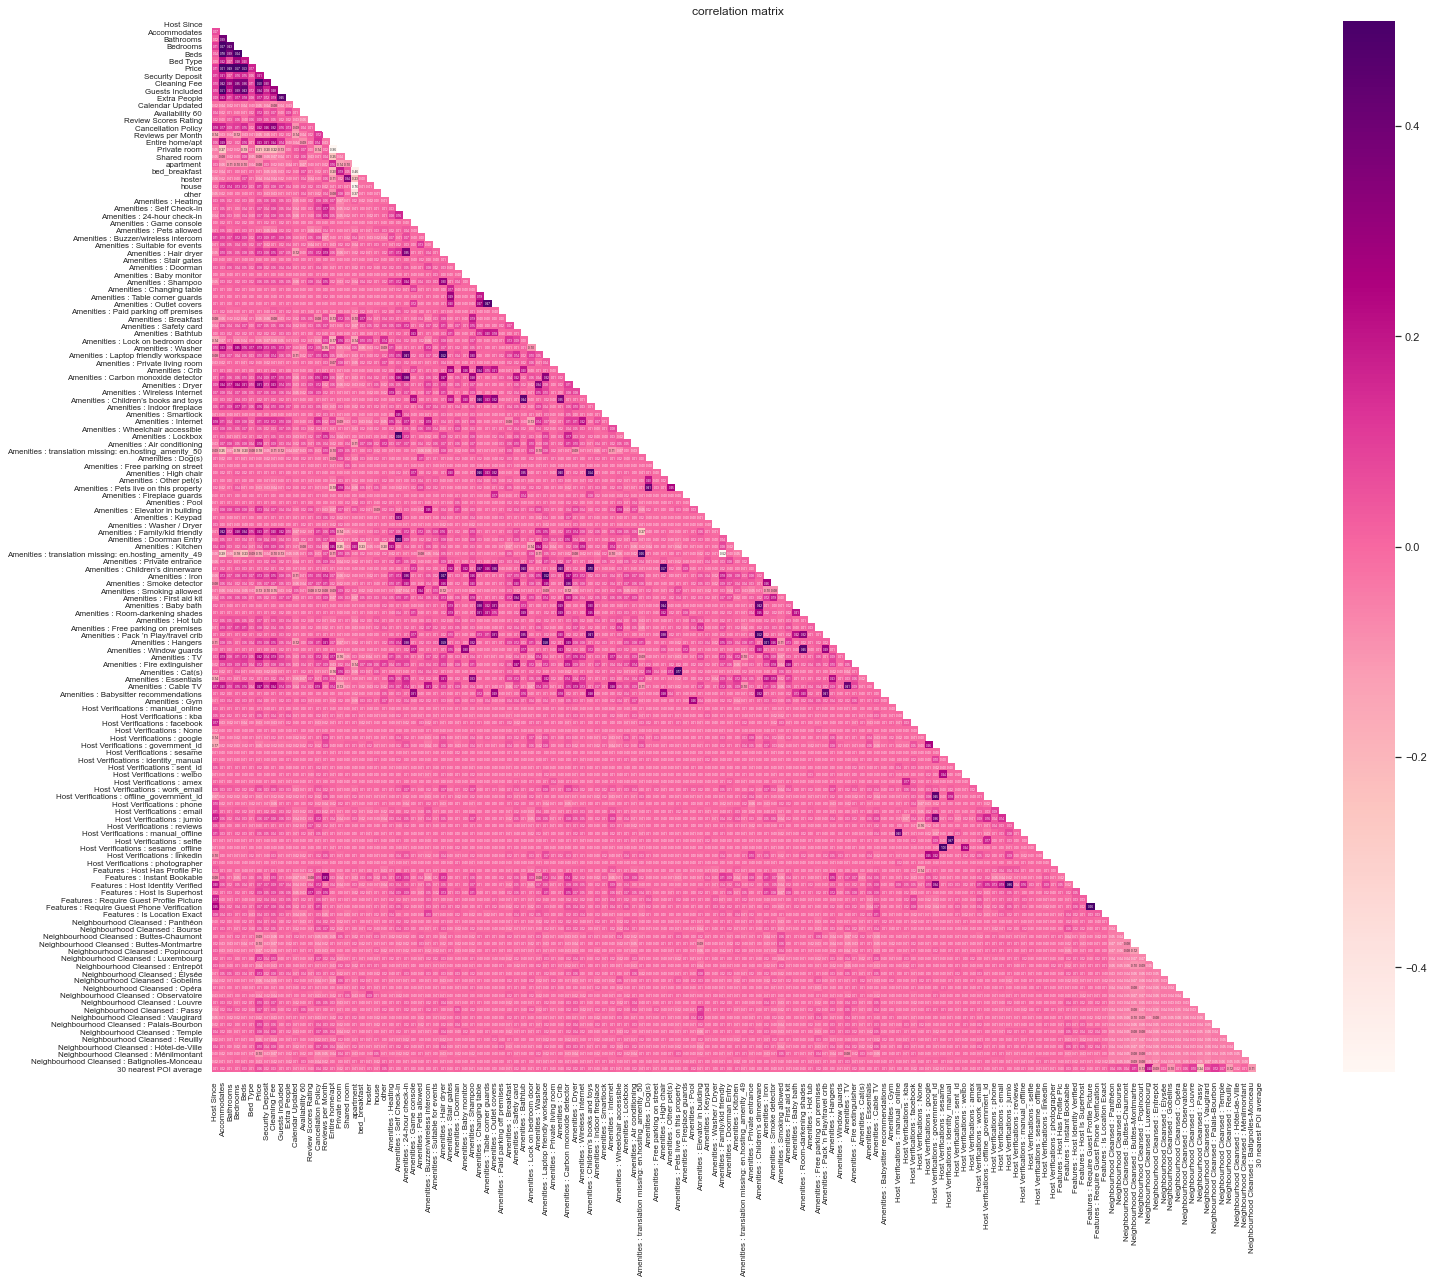

In [40]:
print(plt.get_backend())

# close any existing plots
plt.close("all")

# get the correlation coefficient between the different columns
corr = df_stat.corr()
arr_corr = corr.to_numpy()
# mask out the top triangle
arr_corr[np.triu_indices_from(arr_corr)] = np.nan

fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True, 
                 square=True, cmap=plt.cm.RdPu)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)

ax.set_title('correlation matrix')
plt.tight_layout()
plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)

In [46]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [47]:
print(get_top_abs_correlations(df_stat, 10))

Host Verifications : sesame             Host Verifications : sesame_offline    1.000000
Host Verifications : identity_manual    Host Verifications : selfie            0.973631
Entire home/apt                         Private room                           0.958596
Host Verifications : jumio              Features : Host Identity Verified      0.955760
Accommodates                            Beds                                   0.780821
Amenities : Pets live on this property  Amenities : Cat(s)                     0.770470
apartment                               house                                  0.759809
Amenities : Children’s books and toys   Amenities : Children’s dinnerware      0.701480
Amenities : Self Check-In               Amenities : Lockbox                    0.679227
Accommodates                            Bedrooms                               0.670870
dtype: float64


In [83]:
from scipy import stats

df_stat_1 = df_stat['Host Verifications : sesame'].where(df_stat['Host Verifications : sesame_offline'] ==1)
df_stat_0 = df_stat['Host Verifications : sesame'].where(df_stat['Host Verifications : sesame_offline'] ==0)

test_independanceWCTA = stats.mannwhitneyu(df_stat_1, df_stat_0, alternative='two-sided')
print('p-value =',"%.3f"%test_independanceWCTA[1])

p-value = 0.000


In [84]:
df_stat_1 = df_stat['Host Verifications : identity_manual'].where(df_stat['Host Verifications : selfie'] ==1)
df_stat_0 = df_stat['Host Verifications : identity_manual'].where(df_stat['Host Verifications : selfie'] ==0)

test_independanceWCTA = stats.mannwhitneyu(df_stat_1, df_stat_0, alternative='two-sided')
print('p-value =',"%.3f"%test_independanceWCTA[1])

p-value = 0.000


In [85]:
df_stat_1 = df_stat['Entire home/apt'].where(df_stat['Private room'] ==1)
df_stat_0 = df_stat['Entire home/apt'].where(df_stat['Private room'] ==0)

test_independanceWCTA = stats.mannwhitneyu(df_stat_1, df_stat_0, alternative='two-sided')
print('p-value =',"%.3f"%test_independanceWCTA[1])

p-value = 0.000


In [86]:
df_stat_1 = df_stat['Host Verifications : jumio'].where(df_stat['Features : Host Identity Verified'] ==1)
df_stat_0 = df_stat['Host Verifications : jumio'].where(df_stat['Features : Host Identity Verified'] ==0)

test_independanceWCTA = stats.mannwhitneyu(df_stat_1, df_stat_0, alternative='two-sided')
print('p-value =',"%.3f"%test_independanceWCTA[1])

p-value = 0.000


In [88]:
df_stat['Entire home/apt'].value_counts()

1    34727
0     5301
Name: Entire home/apt, dtype: int64

## Graphiques pour analyser les distributions des variables

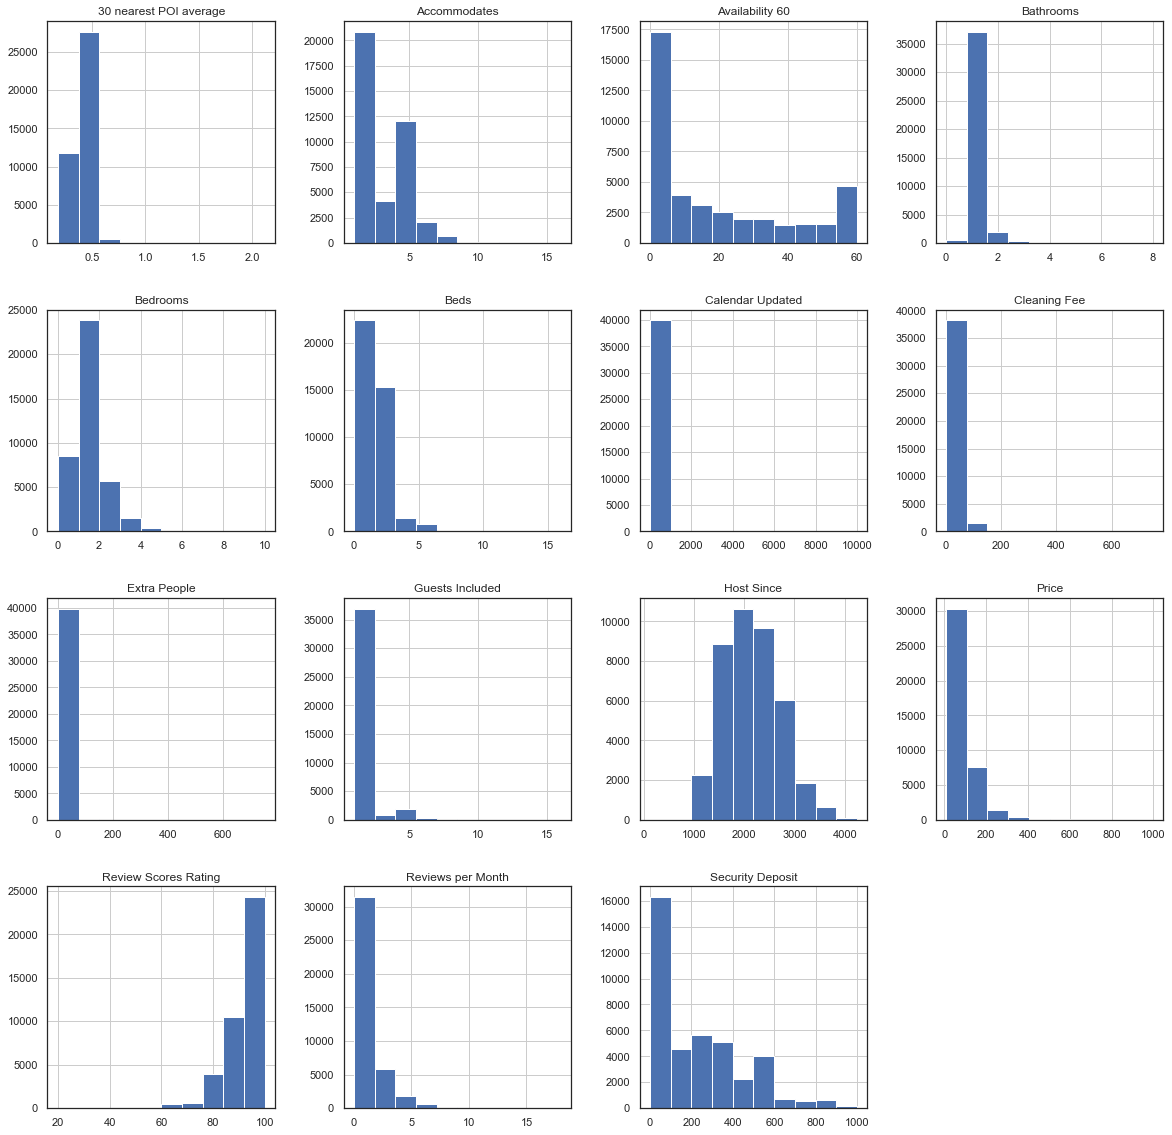

In [39]:
df_stat[numerical_columns].hist(figsize=(20,20));

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


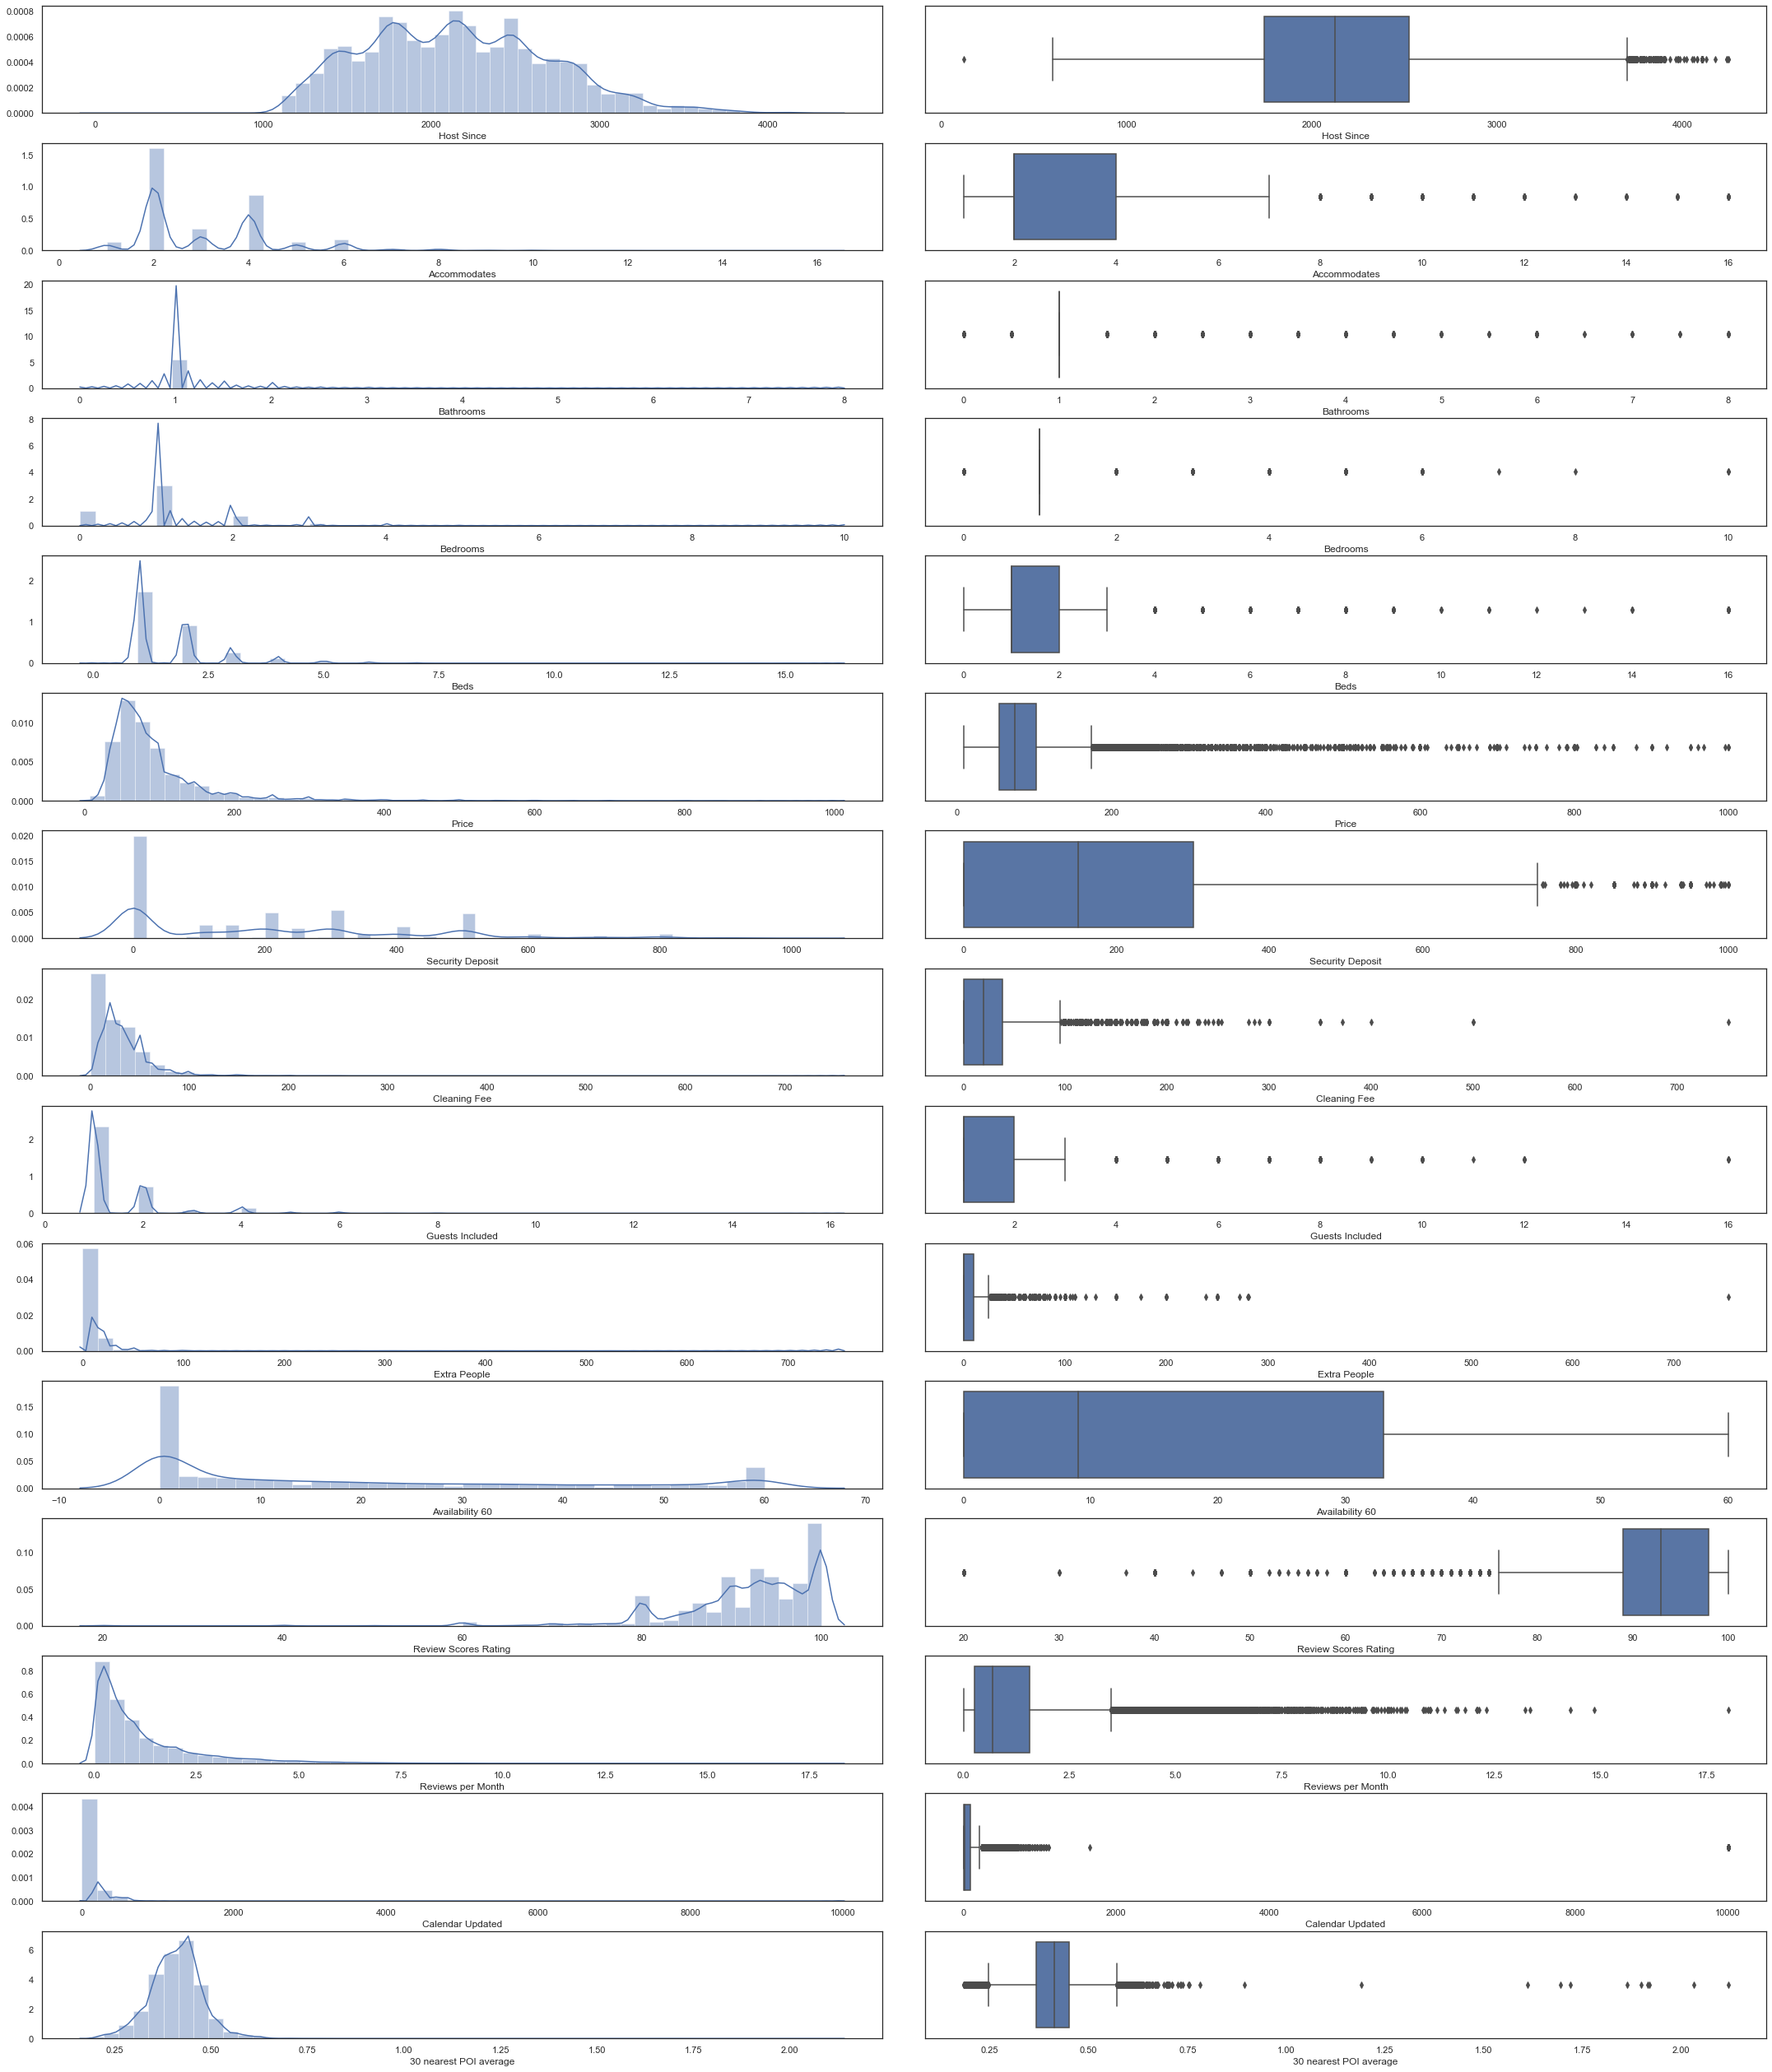

In [26]:
fig, axes = plt.subplots(nrows=15, ncols=2,figsize=(30,35))
fig.tight_layout()
for i in range(len(numerical_columns)):
    sns.distplot(df_stat[numerical_columns[i]], ax=axes[i,0])
    sns.boxplot(df_stat[numerical_columns[i]], ax=axes[i,1])
fig.show()

[Text(0, 0, 'Apartment'),
 Text(0, 0, 'Bed & Breakfast'),
 Text(0, 0, 'Boat'),
 Text(0, 0, 'Boutique hotel'),
 Text(0, 0, 'Bungalow'),
 Text(0, 0, 'Cabin'),
 Text(0, 0, 'Camper/RV'),
 Text(0, 0, 'Cave'),
 Text(0, 0, 'Condominium'),
 Text(0, 0, 'Dorm'),
 Text(0, 0, 'Earth House'),
 Text(0, 0, 'Guesthouse'),
 Text(0, 0, 'Hostel'),
 Text(0, 0, 'House'),
 Text(0, 0, 'Igloo'),
 Text(0, 0, 'Loft'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Serviced apartment'),
 Text(0, 0, 'Timeshare'),
 Text(0, 0, 'Tipi'),
 Text(0, 0, 'Townhouse'),
 Text(0, 0, 'Treehouse'),
 Text(0, 0, 'Villa')]

<Figure size 2160x2880 with 0 Axes>

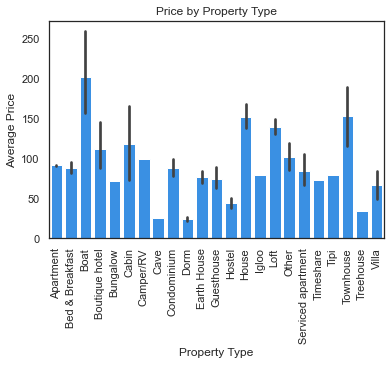

In [29]:
by_ptype = df_initial.sort_values(by='Property Type')

fig = plt.figure(figsize=(30,40))
bar, ax = plt.subplots() 
ax = sns.barplot( x='Property Type', y='Price', data=by_ptype, color='dodgerblue') 
ax.set_title('Price by Property Type') 
ax.set_xlabel('Property Type') 
ax.set_ylabel('Average Price') 
ax.set_xticklabels(labels=by_ptype['Property Type'].unique(), rotation=90) 

[Text(0, 0, 'flexible'),
 Text(0, 0, 'moderate'),
 Text(0, 0, 'strict'),
 Text(0, 0, 'super_strict_30')]

<Figure size 2160x2880 with 0 Axes>

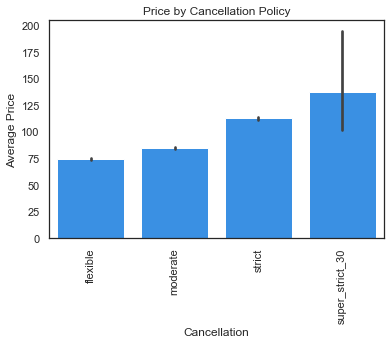

In [30]:
by_ptype = df_initial.sort_values(by='Cancellation Policy')

fig = plt.figure(figsize=(30,40))
bar, ax = plt.subplots() 
ax = sns.barplot( x='Cancellation Policy', y='Price', data=by_ptype, color='dodgerblue') 
ax.set_title('Price by Cancellation Policy') 
ax.set_xlabel('Cancellation') 
ax.set_ylabel('Average Price') 
ax.set_xticklabels(labels=by_ptype['Cancellation Policy'].unique(), rotation=90) 

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16')]

<Figure size 2160x2880 with 0 Axes>

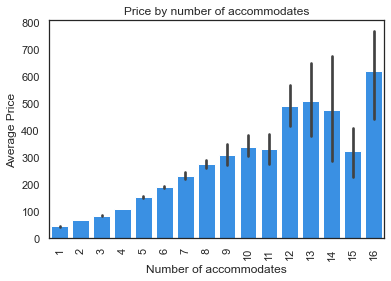

In [32]:
by_ptype = df_initial.sort_values(by='Accommodates')

fig = plt.figure(figsize=(30,40))
bar, ax = plt.subplots() 
ax = sns.barplot( x='Accommodates', y='Price', data=by_ptype, color='dodgerblue') 
ax.set_title('Price by number of accommodates') 
ax.set_xlabel('Number of accommodates') 
ax.set_ylabel('Average Price') 
ax.set_xticklabels(labels=by_ptype['Accommodates'].unique(), rotation=90) 

[Text(0, 0, '0.0'),
 Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '10.0')]

<Figure size 2160x2880 with 0 Axes>

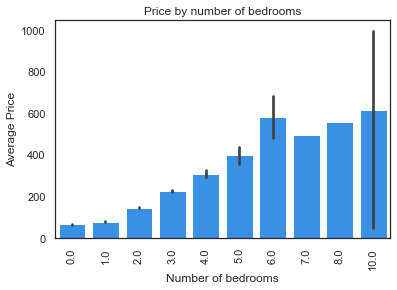

In [33]:
by_ptype = df_initial.sort_values(by='Bedrooms')

fig = plt.figure(figsize=(30,40))
bar, ax = plt.subplots() 
ax = sns.barplot( x='Bedrooms', y='Price', data=by_ptype, color='dodgerblue') 
ax.set_title('Price by number of bedrooms') 
ax.set_xlabel('Number of bedrooms') 
ax.set_ylabel('Average Price') 
ax.set_xticklabels(labels=by_ptype['Bedrooms'].unique(), rotation=90) 

[Text(0, 0, '0.0'),
 Text(0, 0, '1.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '3.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '10.0'),
 Text(0, 0, '11.0'),
 Text(0, 0, '12.0'),
 Text(0, 0, '13.0'),
 Text(0, 0, '14.0'),
 Text(0, 0, '16.0')]

<Figure size 2160x2880 with 0 Axes>

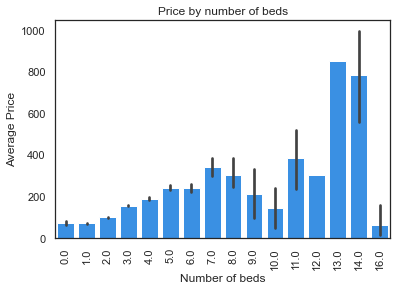

In [34]:
by_ptype = df_initial.sort_values(by='Beds')

fig = plt.figure(figsize=(30,40))
bar, ax = plt.subplots() 
ax = sns.barplot( x='Beds', y='Price', data=by_ptype, color='dodgerblue') 
ax.set_title('Price by number of beds') 
ax.set_xlabel('Number of beds') 
ax.set_ylabel('Average Price') 
ax.set_xticklabels(labels=by_ptype['Beds'].unique(), rotation=90) 

[Text(0, 0, '20.0'),
 Text(0, 0, '30.0'),
 Text(0, 0, '37.0'),
 Text(0, 0, '40.0'),
 Text(0, 0, '44.0'),
 Text(0, 0, '47.0'),
 Text(0, 0, '50.0'),
 Text(0, 0, '52.0'),
 Text(0, 0, '53.0'),
 Text(0, 0, '54.0'),
 Text(0, 0, '55.0'),
 Text(0, 0, '56.0'),
 Text(0, 0, '57.0'),
 Text(0, 0, '58.0'),
 Text(0, 0, '60.0'),
 Text(0, 0, '63.0'),
 Text(0, 0, '64.0'),
 Text(0, 0, '65.0'),
 Text(0, 0, '66.0'),
 Text(0, 0, '67.0'),
 Text(0, 0, '68.0'),
 Text(0, 0, '69.0'),
 Text(0, 0, '70.0'),
 Text(0, 0, '71.0'),
 Text(0, 0, '72.0'),
 Text(0, 0, '73.0'),
 Text(0, 0, '74.0'),
 Text(0, 0, '75.0'),
 Text(0, 0, '76.0'),
 Text(0, 0, '77.0'),
 Text(0, 0, '78.0'),
 Text(0, 0, '79.0'),
 Text(0, 0, '80.0'),
 Text(0, 0, '81.0'),
 Text(0, 0, '82.0'),
 Text(0, 0, '83.0'),
 Text(0, 0, '84.0'),
 Text(0, 0, '85.0'),
 Text(0, 0, '86.0'),
 Text(0, 0, '87.0'),
 Text(0, 0, '88.0'),
 Text(0, 0, '89.0'),
 Text(0, 0, '90.0'),
 Text(0, 0, '91.0'),
 Text(0, 0, '92.0'),
 Text(0, 0, '93.0'),
 Text(0, 0, '94.0'),
 Text(0, 0, '

<Figure size 3240x3600 with 0 Axes>

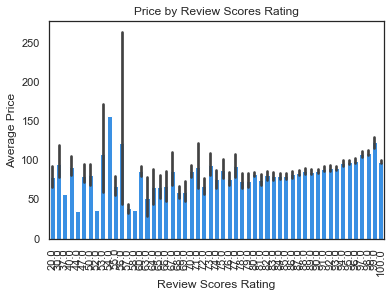

In [81]:
by_ptype = df_initial.sort_values(by='Review Scores Rating')

fig = plt.figure(figsize=(45,50))
bar, ax = plt.subplots(sharex=True) 
ax = sns.barplot( x='Review Scores Rating', y='Price', data=by_ptype, color='dodgerblue') 
ax.set_title('Price by Review Scores Rating') 
ax.set_xlabel('Review Scores Rating') 
ax.set_ylabel('Average Price') 
ax.set_xticklabels(labels=by_ptype['Review Scores Rating'].unique(), minor=False,rotation=90)